<a href="https://colab.research.google.com/github/vivekvardhan30/AIML-LAB/blob/main/Lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Implement Random Forest Ensemble Model using Lending Data**

Import the required Python, Pandas, Matplotlib, Seaborn packages

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data


In [3]:
df1=pd.read_csv("loan_data.csv")
df1.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Check the data types of each feature(column) in the dataset

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Generate a summary of the dataset for min, max, stddev,
quartile vales for 25%,50%,75%,90%,

In [6]:
df1.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## **Display the count of credit Approvals done by Company**

In [10]:
print("Following is a breakup of credit approval status.\n 1 means approved credit , 0 means not approved")
print(df1['credit.policy'].value_counts())

Following is a breakup of credit approval status.
 1 means approved credit , 0 means not approved
1    7710
0    1868
Name: credit.policy, dtype: int64


# **## Exploratory Data Analysis**

Histogram of FICO score by approved or disapproved credit policies

Text(0.5, 0, 'FICO score')

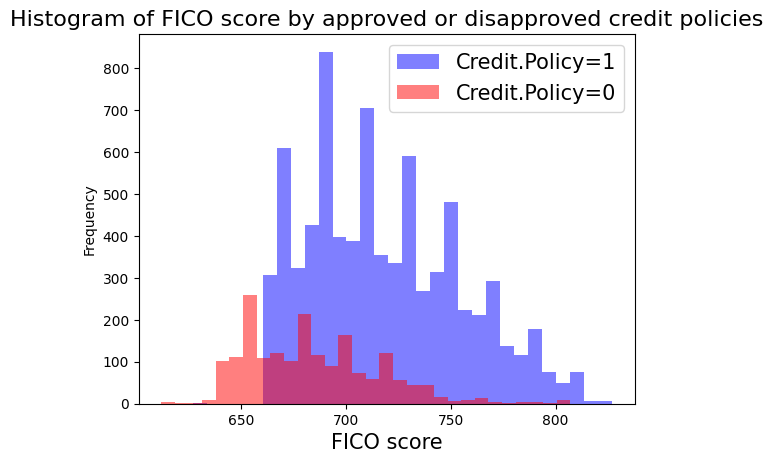

In [12]:
df1[df1['credit.policy']==1]['fico'].plot.hist(bins=30,alpha=0.5,color='blue',label='Credit.Policy=1')
df1[df1['credit.policy']==0]['fico'].plot.hist(bins=30,alpha=0.5,color='red',label='Credit.Policy=0')
plt.legend(fontsize=15)
plt.title("Histogram of FICO score by approved or disapproved credit policies",fontsize=16)
plt.xlabel("FICO score",fontsize=15)

Presence or absence of statistical difference<br> of various factors between credit approval status

Text(0, 0.5, 'Interest rate')

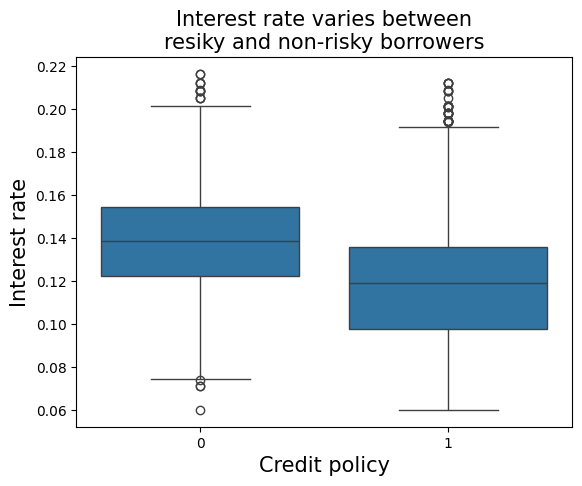

In [13]:
sns.boxplot(x=df1['credit.policy'],y=df1['int.rate'])
plt.title("Interest rate varies between\nresiky and non-risky borrowers",fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Interest rate",fontsize=15)

Text(0, 0.5, 'Days with credit line')

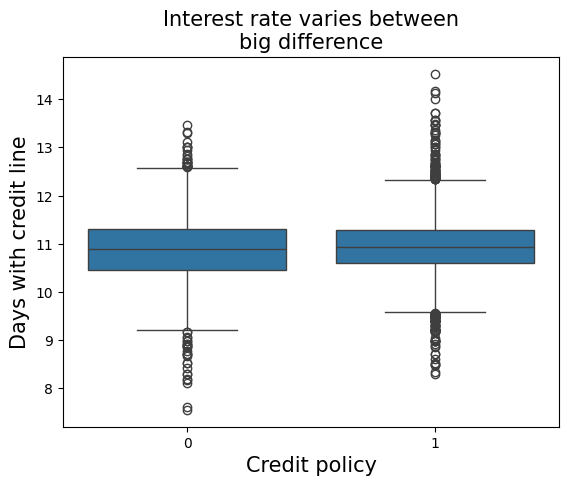

In [16]:
sns.boxplot(x=df1['credit.policy'],y=df1['log.annual.inc'])
plt.title("Interest rate varies between\nbig difference",fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Days with credit line",fontsize=15)

Text(0, 0.5, 'Days with CR')

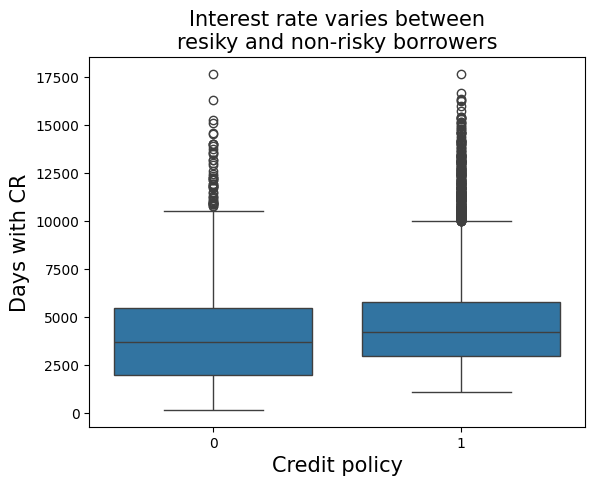

In [21]:
sns.boxplot(x=df1['credit.policy'],y=df1['days.with.cr.line'])
plt.title("Interest rate varies between\nresiky and non-risky borrowers",fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Days with CR",fontsize=15)

**Count plot of loans by purpose<br> with the color hie defined by not.fully.paid**

Text(0.5, 0, 'Purpose')

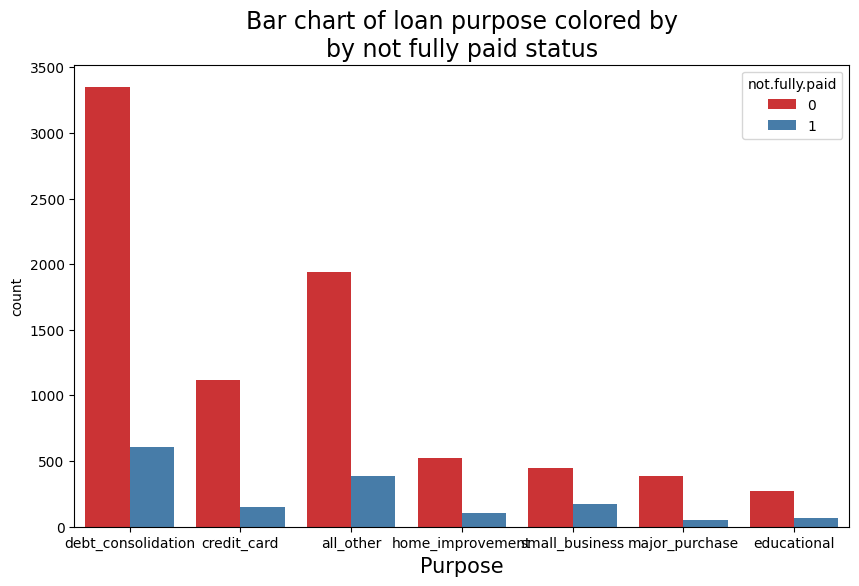

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df1,palette='Set1')
plt.title("Bar chart of loan purpose colored by\nby not fully paid status",fontsize=17)
plt.xlabel("Purpose",fontsize=15)

Trend between FICO score and interest rate

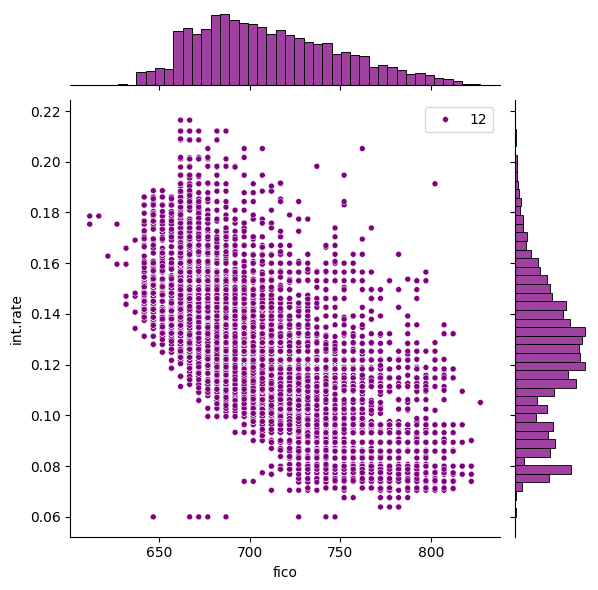

In [20]:
sns.jointplot(x='fico',y='int.rate',data=df1,color='purple',size=12)

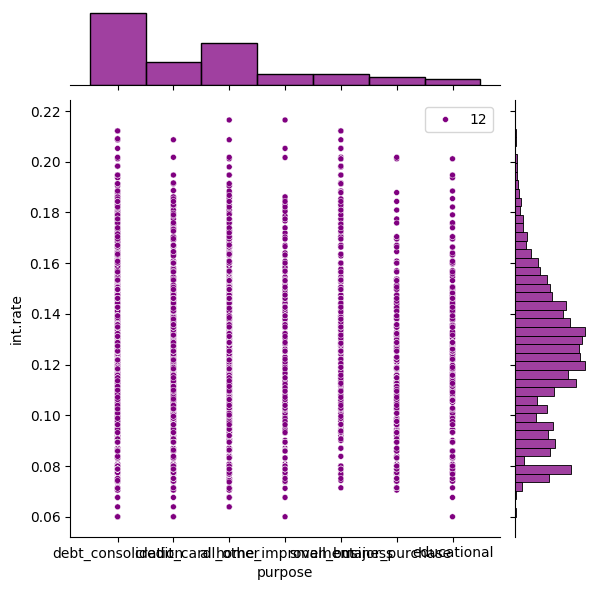

In [22]:
sns.jointplot(x='purpose',y='int.rate',data=df1,color='purple',size=12)

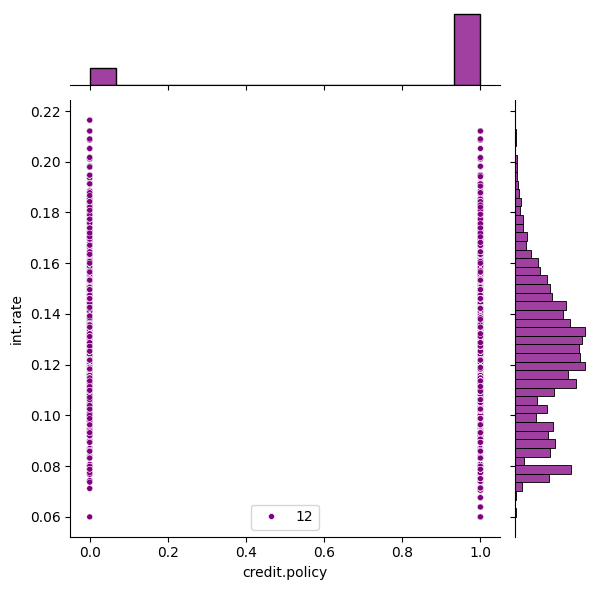

In [25]:
sns.jointplot(x='credit.policy',y='int.rate',data=df1,color='purple',size=12)

Implot to see if the trend differed<br>
between not.fully and credit.policy

<Figure size 1400x700 with 0 Axes>

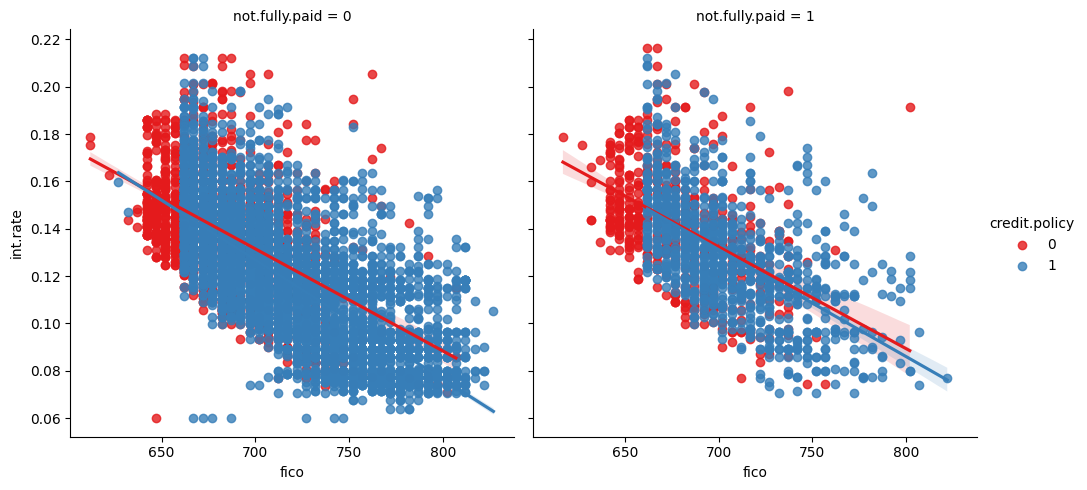

In [38]:
plt.figure(figsize=(14,7))
sns.lmplot(y='int.rate',x='fico',data=df1,hue='credit.policy',col='not.fully.paid',palette='Set1')

## **Setting up the Data**

 **Categorical Features**

The purpose column as categorical.We transform the using dummy variable

In [31]:
df_final=pd.get_dummies(df1,['purpose'],drop_first=True)

In [32]:
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
X=df_final.drop('not.fully.paid',axis=1)
Y=df_final['not.fully.paid']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [37]:
X_train.shape,y_test.shape

((6704, 18), (2874,))

# **Training a Decision Tree Model**

In [40]:
from sklearn.tree import DecisionTreeClassifier

Create an instance of DecisionTreeClassifier()<br>
called dtree and fit it to thr training data.

In [43]:
dtree=DecisionTreeClassifier(criterion='gini',max_depth=None)

In [44]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Prediction

In [47]:
predictions=dtree.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2400
           1       0.23      0.26      0.24       474

    accuracy                           0.73      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.73      0.74      2874



In [51]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print('Accuracy of prediction:',round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[1981  419]
 [ 351  123]]
Accuracy of prediction: 0.732


# **Training the Random Forest model**

Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc=RandomForestClassifier(n_estimators=600)

In [54]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)